## 10-714: Homework 0

The goal of this homework is to give you a quick overview of some of the concepts and ideas that you should be familiar with _prior_ to taking this course.  The assignment will require you to build a basic softmax regression algorithm, plus a simple two-layer neural network.  You will create these implementations both in native Python (using the numpy library), and (for softmax regression) in native C/C++.  The homework will also walk you through the process of submitting your assignments to our autograding system.  Along the way, we'll give some guidance as to how you might want to implement these different functions, but overall the details are up to you.  What we will say, though, is that in the Python version you should make heavy use of the linear algebra calls in numpy: trying to use explicit loops will usually make the code much slower than it should be.

**We know that there is a lot of prose text in this assignment, especially in the beginning, and relatively little coding.  That being said, _please_ read carefuly through the entirety of the text in this writeup.  Doing so will describe the process and philosophy behind how we structure our assignments, and will make a huge difference in your ability to complete later assignments.**

All the code development for the homeworks in 10-714 can be done in the Google Colab environment.  However, instead of making extensive use of actual code blocks within a colab notebook, most of the code you develop will be done `.py` files downloaded (automatically) to your Google Drive, and you will largely use the notebook for running shell scripts that test and submit the code to the auto-grader (or optionally for testing out snippets of code as you develop, but this is not required).  This is a somewhat non-standard usage of Colab Notebooks (typically one uses them more like interactive coding environments, with code cells directly in the notebook).  However, our rationale for using them in the way that we do is actually straightforward: in addition to being a nice cloud-based notebook environment, Colab also provides very nice access to "standard" cloud-based GPU systems that you can spin up quickly, which will let you develop especially some of the later (CUDA-based) code without requiring you to get access to a physical GPU, or set up the CUDA libraries yourself.  That being said, **you are welcome to do the development and submission of your code in any environment you like**, we just can't guarantee the abiltiy to support any environment other than the Colab-based one.

To get started, **make a copy of this notebook** file by selecting "Save a copy in Drive" from the "File" menu, and then run the code block below.  This will load your Google Drive folder into the Colab notebook environment, create a `/10714/hw0` directory, and clone the HW0 public repository into this directory.

In [ ]:
# Code to set up the assignment

# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/
# !mkdir -p 10714
# %cd /content/drive/MyDrive/10714
# !git clone https://github.com/dlsyscourse/hw0.git
# %cd /content/drive/MyDrive/10714/hw0

This next cell will then install the libraries required.

In [1]:
!pip3 install --upgrade --no-deps git+https://github.com/dlsyscourse/mugrade.git
!pip3 install pybind11
!pip3 install numdifftools

  Cloning https://github.com/dlsyscourse/mugrade.git to /private/var/folders/3f/0khzn0nn5f76v2j3f72slrwc0000gn/T/pip-req-build-v7b1r63e
  Running command git clone --filter=blob:none --quiet https://github.com/dlsyscourse/mugrade.git /private/var/folders/3f/0khzn0nn5f76v2j3f72slrwc0000gn/T/pip-req-build-v7b1r63e
  Resolved https://github.com/dlsyscourse/mugrade.git to commit 98609ee80ee24bf278455b48aa8d06bd3f5d0430
  Preparing metadata (setup.py) ... done
  Created wheel for mugrade: filename=mugrade-1.2-py3-none-any.whl size=3941 sha256=2b74a94898aff4ce1f6b8fe260119ae807b6ce067f28b5fb38fd542f3280399a
  Stored in directory: /private/var/folders/3f/0khzn0nn5f76v2j3f72slrwc0000gn/T/pip-ephem-wheel-cache-m5vtg13a/wheels/34/fc/7b/b633e8d9576c3d31be63bce1751d416eae30f1c81efdec0e87
Successfully built mugrade


## Question 1: A basic `add` function, and testing/autograding basics

To illustrate the workflow of these assignments and the autograding system, we'll use a simple example of implementing an `add` function.  Note that the commands run above will create the following structure in your `10714/hw0` directory

    data/
        train-images-idx3-ubyte.gz
        train-labels-idx1-ubyte.gz
        t10k-images-idx3-ubyte.gz
        t10k-labels-idx1-ubyte.gz
    src/
        simple_ml.py
        simple_ml_ext.cpp
    tests/
        test_simple_ml.py
    Makefile
    
The `data/` directory contains the data needed for this assignment (a copy of the MNIST data set); the `src/` directory contains the source files where you will write your implementations; the `tests/` directory contains tests that will evaluate (locally) your solution, and also submit them for autograding.  And the `Makefile` file is a makefile that will compile the code (relevant for the C++ portions of the assignment).

The first homework question requires you to implement `simple_ml.add()` function (this trivial function is not used anywhere, it is just an example to get you used to the structure of the assignment).  Looking at the `src/simple_ml.py` file, you will find the following function stub for the `add()` function.

```python
def add(x, y):
    """ A trivial 'add' function you should implement to get used to the 
    autograder and submission system.  The solution to this problem is in
    the homework notebook.

    Args:
        x (Python number or numpy array)
        y (Python number or numpy array)

    Return:
        Sum of x + y
    """
    ### YOUR CODE HERE
    pass
    ### END YOUR CODE
```
The docstring in each file defines the expected input/output mapping that your function should produce (you need to get used to reading carefully, as the number one source of errors in submissions, we typically find,  is simply not reading the spec).  And hopefully it's pretty obvious to you how to implement this function.  You would just replace the `pass` statement with the correct code, namely the following:

```python
def add(x, y):
    """ A trivial 'add' function you should implement to get used to the 
    autograder and submission system.  The solution to this problem is in the
    the homework notebook.

    Args:
        x (Python number or numpy array)
        y (Python number or numpy array)

    Return:
        Sum of x + y
    """
    ### YOUR CODE HERE
    return x + y
    ### END YOUR CODE
```
Go ahead and do this in your `src/simple_ml.py` file.

### Running local tests

Now you will want to test to see if your code works, and if so, to submit it to the autograding system.  Throughout this course, we are using standard tools for running unit tests on code, namely the `pytest` system.  Once you've written the correct code in the `src/simple_ml.py` file, run the following command below.

In [4]:
!python3 -m pytest -k "add"

============================= test session starts ==============================
platform darwin -- Python 3.10.9, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/zionsheng/Develop/CMU-22fa-10.714/hw0
plugins: anyio-3.5.0
collected 6 items / 5 deselected / 1 selected                                  

tests/test_simple_ml.py .                                                [100%]

======================= 1 passed, 5 deselected in 0.40s ========================


If all goes correctly, you will see that one tests is passed correctly.  To see how this test works, take a look at the `tests/test_simple_ml.py` file, specifically the `test_add()` function:

```python
def test_add():
    assert add(5,6) == 11
    assert add(3.2,1.0) == 4.2
    assert type(add(4., 4)) == float
    np.testing.assert_allclose(add(np.array([1,2]), np.array([3,4])),
                               np.array([4,6]))
```

This code runs a suite of unit tests against your implemented function.  If the function is implemented correctly, then all the assertions above _should_ pass (i.e., the code will execute without errors).  If on the other hand, you implemented something incorrectly (say, changed the `x + y` above to `x - y`), then these assertions will fail, and `pytest` will indicate that the corresponding test failed.

In [4]:
# in this example cell, we replaced "x + y" with "x - y" in simple_ml.add()
!python3 -m pytest -k "add"

============================= test session starts ==============================
platform darwin -- Python 3.10.9, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/zionsheng/Develop/CMU-22fa-10.714/hw0
plugins: anyio-3.5.0
collected 6 items / 5 deselected / 1 selected                                  

tests/test_simple_ml.py F                                                [100%]

=================================== FAILURES ===================================
___________________________________ test_add ___________________________________

    def test_add():
>       assert add(5,6) == 11
E       assert -1 == 11
E        +  where -1 = add(5, 6)

tests/test_simple_ml.py:16: AssertionError
=========================== short test summary info ============================
FAILED tests/test_simple_ml.py::test_add - assert -1 == 11
======================= 1 failed, 5 deselected in 0.61s ========================


As you can see, you will get an error that indicates the line where the assertion failed, which you can then use to go back and debug your implementation.  **You should get comfortabale with reading and tracing through the tests file as a way of better understanding how your implementations should work.**

Learning to properly develop and use unit tests is crucial to modern software development, and hopefully a secondary outcome of this course is that you become familiar with the typical usage of unit tests within software development.  Of course, this isn't entirely true, because you don't necessarily need to _write_ your own tests to pass the questions here, but you _should_ become familiar with how to read the test files that we provide, as a way to understand how your function should behave.  However, we _absolutely_ would also encourage you to write additional tests for your implementations, especially if you find that your code is passing the local tests, but still seems to be failing on submission.

One last quick comment.  If you're used to debugging code via print statements, note that **pytest will by default capture any output**. You can disable this behavior and have the tests display all output in all cases by passing the `-s` flag to pytest.

### Submitting to the autograder

Now that you have passed the unit tests, it is time to submit your solution for autograding.  For autograding in this class we are using a custom application written by the course instructors.  To start the autograding progress, go to http://mugrade.dlsyscourse.org (or http://mugrade-online.dlsyscourse.org for the public online version of the course) and login in **using your course email** (for CMU students, this will be your andrew email, for online course students, this will be the email you used to sign up for the course).  We have created accounts for everyone under these emails in mugrade, but you will need to reset your password using the "Forgot you password?" link.

Once you've created an account, in the left hand navigation bar, click on the "Grader Key" link, and copy the associated key (including the leading underscore if present).  This key is linked to _your submissions_ for the course, and anyone with the key could submit your assignments; therefore, you should not share this key with anyone, and just use it to submit your own code below.  Once you have this key, run the following command.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "add"

Running this command will submit your `add` function to the mugrade autograding system.  To see how this works internally, take a look at the `tests/test_simply_ml.py` file again, but this time the `submit_add()` function right below the `test_add` function.

```python
def submit_add():
    mugrade.submit(add(1,2))
    mugrade.submit(add(4.5, 3.2))
    mugrade.submit(type(add(3,2)))
    mugrade.submit(add(np.array([1.,2.]), np.array[5,6]))
```

This code looks a bit like a unit test above, but instead of assertions there are calls to `mugrade.submit()`.  These calls each evaluate the `add` function on different inputs, then send the result to the mugrade server.  The server compares the output of your function with the correct output (which is only stored on the server, not locally, so you cannot know in advance what the correct answer is), and updates your score for the assignment accordingly.  If you are logged into the mugrade system, you can go to the "Homework 0" assignment to see your updated grade (clicking "Refresh" as necessary if you are already viewing the page).

**Important note:** For those of you familiar with autograding systems, you might notice that mugrade works a bit differently than most.  In most autograding systems you write your code to pass local tests (if you're lucky, some classes don't even provide these), then bundle up your code and submit it to the autograding system, which will unpack and execute your code on the autograding server, running it against some (unknown, for you) test cases.  Mugrade is different: the `submit_add` function is run on _your system_ (e.g., in the Colab environment you are running), and only the _results_ of the calls are sent to the server.

The rationale for this setup is a subtle but important one.  This class requires you to develop a fairly complex system, which runs your code on specialized hardware like GPUs, on potentially long tests that train real neural network architectures.  Being unable to debug the execution of your code on the autograding test cases poses a substantial challenge in practice, not to mention issues of server capacity and slowdowns that occur usually right at the grading deadline.  Moving computation locally means that you have a lot more insight into how your code is actually running on the autograder test cases, which is extremely valuable for debugging.  By _far_ the most common post on forums for similar courses is "my code passes all the local tests but fails on the autograder"; and while this situation can _still_ happen in mugrade, you can at least step through the execution of your code to see _where_ and _how_ it fails.  And because the server only needs to perform simple checks of your input against the correct outputs, the server is very simple, and you will get the feedback from the autograder immediately, even right at the submission deadline.

The _disadvantage_ of a grading system like this is that it's possible to cheat.  Because you have complete control over the local execution of your code on the autograding test cases, you could, in theory, just figure out what the correct answers should be, and return them without actually implementing the required code.  Later in this assignment, for instance, you're required to write a C++ implementation of softmax regression in addition to the initial Python one.  It would be completely possible to change the autograder to use your Python implementation, rather than the C++ one, and still pass the tests.  That being said, **please do not attempt to circumvent the autograding system in any way**.  Our goal for this system is to make it genuinely easier for your to debug and develop your code, and to make the experience more similar to the "real" development process, and less a matter of "figuring out why the autograder doesn't compile your particular variant of CUDA code".  To address this point, in addition to submitting the autograder tests, when you are finished with your submission you need to also upload a `.tar.gz` file of your `/src` directory in your solution to the mugrade system.  We trust that this will not be an issue, but if there _are_ any concerns, the TAs will always be able to validate that your code produces the results (they will also be running against standard plagiarism detection systems like MOSS).



## Question 2: Loading MNIST data

Now that you're familiar with the autograding system, try it out on the next function you need to implement in the `src/simple_ml.py` file: the `parse_mnist_data()` function.  Here is the function declaration from the file (we typically won't walk through this whole process again, but will do so here one more time).

```python
def parse_mnist(image_filename, label_filename):  
    """ Read an images and labels file in MNIST format.  See this page:
    http://yann.lecun.com/exdb/mnist/ for a description of the file format.

    Args:
        image_filename (str): name of gzipped images file in MNIST format
        label_filename (str): name of gzipped labels file in MNIST format

    Returns:
        Tuple (X,y):
            X (numpy.ndarray[np.float32]): 2D numpy array containing the loaded 
                data.  The dimensionality of the data should be 
                (num_examples x input_dim) where 'input_dim' is the full 
                dimension of the data, e.g., since MNIST images are 28x28, it 
                will be 784.  Values should be of type np.float32, and the data 
                should be normalized to have a minimum value of 0.0 and a 
                maximum value of 1.0. The normalization should be applied uniformly
                across the whole dataset, _not_ individual images.

            y (numpy.ndarray[dtype=np.uint8]): 1D numpy array containing the
                labels of the examples.  Values should be of type np.uint8 and
                for MNIST will contain the values 0-9.
    """
    ### YOUR CODE HERE
    pass
    ### END YOUR CODE
```

Hopefully you're now familiar with how this docstring works, and have an idea about how to go about implementing this function.  First, go to http://yann.lecun.com/exdb/mnist/ or this alternate [link](https://web.archive.org/web/20220509025752/http://yann.lecun.com/exdb/mnist/) (the bottom of the page) to read about the binary format for the MNIST data.  Then write a loader that will read files of this type, and return numpy arrays according to the specification in the docstring (if you're having any issues with the implementation, be sure to read the docstring closely).  We'd recommend you use the `struct` module in python (along with the `gzip` module and of course `numpy` itself), in order to implement this function.

When you've implemented the function run the local unit tests.


In [33]:
!python3 -m pytest -k "parse_mnist"

============================= test session starts ==============================
platform darwin -- Python 3.10.9, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/zionsheng/Develop/CMU-22fa-10.714/hw0
plugins: anyio-3.5.0
collected 6 items / 5 deselected / 1 selected                                  

tests/test_simple_ml.py .                                                [100%]

======================= 1 passed, 5 deselected in 0.85s ========================


In [40]:
import gzip
import struct
import numpy as np

image_file = gzip.open("./data/train-images-idx3-ubyte.gz", 'rb')
MAX_PIXEL_VALUE = 255.0
with image_file as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    image_data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    image_data = image_data.reshape((size, nrows * ncols))
    image_data = image_data.astype(np.float32) / MAX_PIXEL_VALUE
image_file.close()

In [41]:
image_data.shape

(60000, 784)

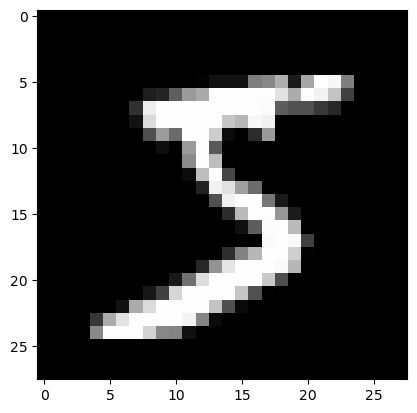

In [44]:
import matplotlib.pyplot as plt

plt.imshow(image_data[0,:].reshape((nrows, ncols)), cmap='gray')

In [38]:
label_file = gzip.open("./data/train-labels-idx1-ubyte.gz", 'rb')
with label_file as f:
    _, size = struct.unpack(">II", f.read(8))
    label_data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    label_data = label_data.reshape(size)
label_file.close()

In [39]:
label_data[0]

5

And then submit your code to mugrade.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "parse_mnist"

## Question 3: Softmax loss

Implement the softmax (a.k.a. cross-entropy) loss as defined in `softmax_loss()` function in `src/simple_ml.py`.  Recall (hopefully this is review, but we'll also cover it in lecture on 9/1), that for a multi-class output that can take on values $y \in \{1,\ldots,k\}$, the softmax loss takes as input a vector of logits $z \in \mathbb{R}^k$, the true class $y \in \{1,\ldots,k\}$ returns a loss defined by
$$
\ell_{\mathrm{softmax}}(z, y) = \log\sum_{i=1}^k \exp z_i - z_y.
$$

Note that as described in its docstring, `softmax_loss()` takes a _2D array_ of logits (i.e., the $k$ dimensional logits for a batch of different samples), plus a corresponding 1D array of true labels, and should output the _average_ softmax loss over the entire batch.  Note that to do this correctly, you should _not_ use any loops, but do all the computation natively with numpy vectorized operations (to set expectations here, we should note for instance that our reference solution consists of a single line of code).

Note that for "real" implementation of softmax loss you would want to scale the logits to prevent numerical overflow, but we won't worry about that here (the rest of the assignment will work fine even if you don't worry about this).  The code below runs the test cases.

In [ ]:
!python3 -m pytest -k "softmax_loss"

Then run the submission.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "softmax_loss"

## Question 4: Stochastic gradient descent for softmax regression

In this question you will implement stochastic gradient descent (SGD) for (linear) softmax regression.  In other words, as discussed in lecture on 9/1, we will consider a hypothesis function that makes $n$-dimensional inputs to $k$-dimensional logits via the function
$$
h(x) = \Theta^T x
$$
where $x \in \mathbb{R}^n$ is the input, and $\Theta \in \mathbb{R}^{n \times k}$ are the model parameters.  Given a dataset $\{(x^{(i)} \in \mathbb{R}^n, y^{(i)} \in \{1,\ldots,k\})\}$, for $i=1,\ldots,m$, the optimization problem associated with softmax regression is thus given by
$$
\min_{\Theta} \; \frac{1}{m} \sum_{i=1}^m \ell_{\mathrm{softmax}}(\Theta^T x^{(i)}, y^{(i)}).
$$

Recall from class that the gradient of the linear softmax objective is given by
$$
\nabla_\Theta \ell_{\mathrm{softmax}}(\Theta^T x, y) = x (z - e_y)^T
$$
where
$$
z = \frac{\exp(\Theta^T x)}{1^T \exp(\Theta^T x)} \equiv \text{normalize}(\exp(\Theta^T x))
$$
(i.e., $z$ is just the normalized softmax probabilities), and where $e_y$ denotes the $y$th unit basis, i.e., a vector of all zeros with a one in the $y$th position.

We can also write this in the more compact notation we discussed in class.  Namely, if we let $X \in \mathbb{R}^{m \times n}$ denote a design matrix of some $m$ inputs (either the entire dataset or a minibatch), $y \in \{1,\ldots,k\}^m$ a corresponding vector of labels, and overloading $\ell_{\mathrm{softmax}}$ to refer to the average softmax loss, then
$$
\nabla_\Theta \ell_{\mathrm{softmax}}(X \Theta, y) = \frac{1}{m} X^T (Z - I_y)
$$
where
$$
Z = \text{normalize}(\exp(X \Theta)) \quad \text{(normalization applied row-wise)}
$$
denotes the matrix of logits, and $I_y \in \mathbb{R}^{m \times k}$ represents a concatenation of one-hot bases for the labels in $y$.

Using these gradients, implement the `softmax_regression_epoch()` function, which runs a single epoch of SGD (one pass over a data set) using the specified learning rate / step size `lr` and minibatch size `batch`.  As described in the docstring, your function should modify the `Theta` array in-place.  After implementation, run the tests.

In [ ]:
!python3 -m pytest -k "softmax_regression_epoch and not cpp"

And then run the submission.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "softmax_regression_epoch and not cpp"

### Training MNIST with softmax regression

Although it's not a part of the tests, now that you have written this code, you can also try training a full MNIST linear classifier using SGD.  For this you can use the `train_softmax()` function in the `src/simple_ml.py` file (we have already written this function for you, so you don't need to write it yourself, though you can take a look to see what it's doing).  

You can see how this works using the following code.  For reference, as seen below, our implementation runs in ~3 seconds on Colab, and achieves 7.97% error.

In [26]:
import sys
sys.path.append("src/")
from simple_ml import train_softmax, parse_mnist

X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz", 
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")

train_softmax(X_tr, y_tr, X_te, y_te, epochs=10, lr=0.2, batch=100)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.35134 |   0.10182 |   0.33588 |  0.09400 |
|     1 |    0.32142 |   0.09268 |   0.31086 |  0.08730 |
|     2 |    0.30802 |   0.08795 |   0.30097 |  0.08550 |
|     3 |    0.29987 |   0.08532 |   0.29558 |  0.08370 |
|     4 |    0.29415 |   0.08323 |   0.29215 |  0.08230 |
|     5 |    0.28981 |   0.08182 |   0.28973 |  0.08090 |
|     6 |    0.28633 |   0.08085 |   0.28793 |  0.08080 |
|     7 |    0.28345 |   0.07997 |   0.28651 |  0.08040 |
|     8 |    0.28100 |   0.07923 |   0.28537 |  0.08010 |
|     9 |    0.27887 |   0.07847 |   0.28442 |  0.07970 |


## Question 5: SGD for a two-layer neural network

Now that you've written SGD for a linear classifier, let's consider the case of a simple two-layer neural network.  Specifically, for input $x \in \mathbb{R}^n$, we'll consider a two-layer neural network (without bias terms) of the form
$$z = W_2^T \mathrm{ReLU}(W_1^T x)$$
where $W_1 \in \mathbb{R}^{n \times d}$ and $W_2 \in \mathbb{R}^{d \times k}$ represent the weights of the network (which has a $d$-dimensional hidden unit), and where $z \in \mathbb{R}^k$ represents the logits output by the network.  We again use the softmax / cross-entropy loss, meaning that we want to solve the optimization problem
$$
\min_{W_1, W_2} \;\; \frac{1}{m} \sum_{i=1}^m \ell_{\mathrm{softmax}}(W_2^T \mathrm{ReLU}(W_1^T x^{(i)}), y^{(i)}).
$$
Or alternatively, overloading the notation to describe the batch form with matrix $X \in \mathbb{R}^{m \times n}$, this can also be written
$$
\min_{W_1, W_2} \;\; \ell_{\mathrm{softmax}}(\mathrm{ReLU}(X W_1) W_2, y).
$$

Using the chain rule, we can derive the backpropagation updates for this network (we'll briefly cover these in class, on 9/8, but also provide the final form here for ease of implementation).  Specifically, let
$$
\begin{split}
Z_1 \in \mathbb{R}^{m \times d} & = \mathrm{ReLU}(X W_1) \\
G_2 \in \mathbb{R}^{m \times k} & = \text{normalize}(\exp(Z_1 W_2)) - I_y \\
G_1 \in \mathbb{R}^{m \times d} & = \mathrm{1}\{Z_1 > 0\} \circ (G_2 W_2^T)
\end{split}
$$
where $\mathrm{1}\{Z_1 > 0\}$ is a binary matrix with entries equal to zero or one depending on whether each term in $Z_1$ is strictly positive and where $\circ$ denotes elementwise multiplication.  Then the gradients of the objective are given by
$$
\begin{split}
\nabla_{W_1} \ell_{\mathrm{softmax}}(\mathrm{ReLU}(X W_1) W_2, y) & = \frac{1}{m} X^T G_1  \\
\nabla_{W_2} \ell_{\mathrm{softmax}}(\mathrm{ReLU}(X W_1) W_2, y) & = \frac{1}{m} Z_1^T G_2.  \\
\end{split}
$$

**Note:** If the details of these precise equations seem a bit cryptic to you (prior to the 9/8 lecture), don't worry too much.  These _are_ just the standard backpropagation equations for a two-layer ReLU network: the $Z_1$ term just computes the "forward" pass while the $G_2$ and $G_1$ terms denote the backward pass.  But the precise form of the updates can vary depending upon the notation you've used for neural networks, the precise ways you formulate the losses, if you've derived these previously in matrix form, etc.  If the notation seems like it might be familiar from when you've seen deep networks in the past, and makes more sense after the 9/8 lecture, that is more than sufficient in terms of background (after all, the whole _point_ of deep learning systems, to some extent, is that we don't need to bother with these manual calculations).  But if these entire concepts are _completely_ foreign to you, then it may be better to take a separate course on ML and neural networks prior to this course, or at least be aware that there will be substantial catch-up work to do for the course.

Using these gradients, now write the `nn_epoch()` function in the `src/simple_ml.py` file.  As with the previous question, your solution should modify the `W1` and `W2` arrays in place.  After implementing the function, run the following test.  Be sure to use matrix operations as indicated by the expresssions above to implement the function: this will be _much_ faster, and more efficient, than attempting to use loops (and it requires far less code).

In [ ]:
!python3 -m pytest -k "nn_epoch"

And finally submit for autograding.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "nn_epoch"

### Training a full neural network

As before, though it isn't a strict necessity to pass the autograder, it's rather fun to see how well you can use your neural network function to train an MNIST classifier.  Analogous to the softmax regression case, there is a `train_nn()` function in the `simple_ml.py` file you can use to train this two-layer network via SGD with multiple epochs.  Here is code, for example, that trains a two-layer network with 400 hidden units.

In [25]:
import sys

# Reload the simple_ml module which has been cached from the earlier experiment
import importlib
import simple_ml
importlib.reload(simple_ml)

sys.path.append("src/")
from simple_ml import train_nn, parse_mnist

X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz", 
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")
train_nn(X_tr, y_tr, X_te, y_te, hidden_dim=400, epochs=20, lr=0.2)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.15324 |   0.04697 |   0.16305 |  0.04920 |
|     1 |    0.09854 |   0.02923 |   0.11604 |  0.03660 |
|     2 |    0.07392 |   0.02163 |   0.09750 |  0.03200 |
|     3 |    0.06006 |   0.01757 |   0.08825 |  0.02960 |
|     4 |    0.04869 |   0.01368 |   0.08147 |  0.02620 |
|     5 |    0.04061 |   0.01093 |   0.07698 |  0.02380 |
|     6 |    0.03494 |   0.00915 |   0.07446 |  0.02320 |
|     7 |    0.03027 |   0.00758 |   0.07274 |  0.02320 |
|     8 |    0.02674 |   0.00650 |   0.07103 |  0.02240 |
|     9 |    0.02373 |   0.00552 |   0.06989 |  0.02150 |
|    10 |    0.02092 |   0.00477 |   0.06870 |  0.02130 |
|    11 |    0.01914 |   0.00403 |   0.06837 |  0.02130 |
|    12 |    0.01705 |   0.00325 |   0.06748 |  0.02150 |
|    13 |    0.01541 |   0.00272 |   0.06688 |  0.02130 |
|    14 |    0.01417 |   0.00232 |   0.06657 |  0.02090 |
|    15 |    0.01282 |   0.00195 |   0.06591 |  0.02040 |
|    16 |    0

This takes about 30 seconds to run on Colab for our implementation, and as seen above, it achieve an error of 1.89\% on MNIST.  Not bad for less than 20 lines of code or so...

## Question 6: Softmax regression in C++

The final question in this homework requires you to implement the same function you did in Question 4, a function that runs a single epoch of linear softmax regression.  But here, you will do so with a C++ implementation, rather than a Python one. (Strictly speaking, the actual implementation here is more like raw C, but we use C++ features to build the interface to Python using the [pybind11](https://pybind11.readthedocs.io) library, which you will also use to interface between C++ and Python in later homeworks.  Although there are other alternatives, pybind11 library is relatively nice as an interface, as it is a header-only library, and allows you to implement the entire Python/C++ interface within a single C++ source library.)

The C++ file you'll implement things in is the `src/simple_ml_ext.cpp` file.  Let's take a look at the relevant portion of the file.  You will specifically implement your code in the following function

```cpp
void softmax_regression_epoch_cpp(const float *X, const unsigned char *y, 
								  float *theta, size_t m, size_t n, size_t k, 
								  float lr, size_t batch)
{
    /**
     * A C++ version of the softmax regression epoch code.  This should run a 
     * single epoch over the data defined by X and y (and sizes m,n,k), and
     * modify theta in place.  Your function will probably want to allocate
     * (and then delete) some helper arrays to store the logits and gradients.
     * 
     * Args:
     *     X (const float *): pointer to X data, of size m*n, stored in row 
     *          major (C) format
     *     y (const unsigned char *): pointer to y data, of size m
     *     theta (float *): pointer to theta data, of size n*k, stored in row
     *          major (C) format
     *     m (size_t): number of examples
     *     n (size_t): input dimension
     *     k (size_t): number of classes
     *     lr (float): learning rate / SGD step size
     *     batch (int): SGD minibatch size
     * 
     * Returns:
     *     (None)
     */

    /// YOUR CODE HERE
    
    /// END YOUR CODE
}
```
Let's unpack the arguments to this function a bit.  The function essentially mirrors that of the Python implementation, but requires passing some additional arguments because we are operating on raw pointers to the array data rather than any sort of higher-level "matrix" data structure.  Specifically, `X`, `y`, and `theta` are pointers to the raw data of the corresponding numpy arrays from the previous section; for 2D arrays, these are stored in C-style (row-major) format, meaning that the first row of $X$ is stored sequentially as the first bytes in `X`, then the second row, etc (this contrasts with _column major_ ordering, which stores the first _column_ of the matrirx sequentially, then the second column, etc).  We also assuming there is no padding in the data; that is, the second row begins immediately after the first row, with no additional bytes added, e.g., to align the memory to a certain boundary (all these issues will be mentioned in subsequent discussion in the course, but avoided for now). Of course, because only the raw data is passed into the function, in order to know the actual sizes of the underlying matrices, we also need to pass these sizes explicitly to the function, which is what is provided by the `m`, `n`, and `k` arguments.

As an illustration of how to access the data, note that because `X` represents a row-major, $m \times n$ matrix, if we want to access the $(i,j)$ element of $X$ (the element in the $i$th row and the $j$th column), we would use the index
```cpp
X[i*n + j]
```
i.e., because `X` is $n$ columns, and stores it's columns sequentially, we'd need to access the `X[i*n]` element to access the $i$th row; and if we want to access the $j$th element in this row, we have the expression above.  The same logic would apply to the `theta` matrix, but importantly, because `theta` is a $n \times k$ matrix, to access it's $(i,j)$ element you would use the index
```cpp
theta[i*k + j]
```
Unlike in Python, you need to be very careful when accessing memory directly like this in C++, and get very used to this kind of notation (or build additional data structures that help you access things in a more intuitive fashion, but for this assignment you should just stick to the raw indexing).


The second piece of importance for the implementation is the pybind11 code that actually provides the Python interface
```cpp
PYBIND11_MODULE(simple_ml_ext, m) {
    m.def("softmax_regression_epoch_cpp", 
    	[](py::array_t<float, py::array::c_style> X, 
           py::array_t<unsigned char, py::array::c_style> y, 
           py::array_t<float, py::array::c_style> theta,
           float lr,
           int batch) {
        softmax_regression_epoch_cpp(
        	static_cast<const float*>(X.request().ptr),
            static_cast<const unsigned char*>(y.request().ptr),
            static_cast<float*>(theta.request().ptr),
            X.request().shape[0],
            X.request().shape[1],
            theta.request().shape[1],
            lr,
            batch
           );
    },
    py::arg("X"), py::arg("y"), py::arg("theta"), 
    py::arg("lr"), py::arg("batch"));
}
```
This code is provided for you in the file, and you should not change it at all.  But for those who are curious, this code essentially just extracts the raw pointers from the provided inputs (using pybinds numpy interface), and then calls the corresponding `softmax_regression_epoch_cpp` function.

Using all this as background, implement the `softmax_regression_epoch_cpp` to accomplish the same updates as your Python implementation did.  Note that because you are just accessing the raw data, you will need to perform all the matrix-vector products manually, rather that rely on numpy to do all the matrix operations for you (**note: do not use an external matrix library like Eigen for this assignment, but code the multiplication yourself ... it is a relatively simple one**). After you do so, you can test the implementation using the following commands.

In [28]:
!make
!python3 -m pytest -k "softmax_regression_epoch_cpp"

c++ -O3 -Wall -shared -std=c++11 -fPIC -undefined dynamic_lookup $(python3 -m pybind11 --includes) src/simple_ml_ext.cpp -o src/simple_ml_ext.so
============================= test session starts ==============================
platform darwin -- Python 3.7.3, pytest-4.3.1, py-1.8.0, pluggy-0.9.0
rootdir: /Users/zkolter/Dropbox/class/10-714/homework/hw0, inifile:
plugins: remotedata-0.3.1, openfiles-0.3.2, doctestplus-0.3.0, arraydiff-0.3
collected 6 items / 5 deselected / 1 selected                                  

tests/test_simple_ml.py .                                                [100%]

==================== 1 passed, 5 deselected in 0.49 seconds ====================


Note that unlike our code before, we had to actually compile the C++ extension in order to run an test it.  This will be needed whenever there are C++ components of your code, but in all such cases we will include Makefiles that should compile all the relevant functions and include the necessary libraries/headers.  And finally, let's also submit the results to mugrade.

In [ ]:
!python3 -m mugrade submit YOUR_GRADER_KEY_HERE -k "softmax_regression_epoch_cpp"

### Training a full softmax regression classifier with the C++ version

Let's finally try training the whole softmax regression classifier using our "direct memory acesss" C++ version.  If the previous Python version took ~3 seconds, this should be blazing fast, right?

In [30]:
import sys
sys.path.append("src/")

# Reload the simple_ml module to include the newly-compiled C++ extension
import importlib
import simple_ml
importlib.reload(simple_ml)

from simple_ml import train_softmax, parse_mnist

X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz", 
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")

train_softmax(X_tr, y_tr, X_te, y_te, epochs=10, lr = 0.2, batch=100, cpp=True)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.35134 |   0.10182 |   0.33588 |  0.09400 |
|     1 |    0.32142 |   0.09268 |   0.31086 |  0.08730 |
|     2 |    0.30802 |   0.08795 |   0.30097 |  0.08550 |
|     3 |    0.29987 |   0.08532 |   0.29558 |  0.08370 |
|     4 |    0.29415 |   0.08323 |   0.29215 |  0.08230 |
|     5 |    0.28981 |   0.08182 |   0.28973 |  0.08090 |
|     6 |    0.28633 |   0.08085 |   0.28793 |  0.08080 |
|     7 |    0.28345 |   0.07997 |   0.28651 |  0.08040 |
|     8 |    0.28100 |   0.07923 |   0.28537 |  0.08010 |
|     9 |    0.27887 |   0.07847 |   0.28442 |  0.07970 |


As expected, the numbers match exactly our Python version, and the code is ... about 5 times slower?!  What is going on here?  Well, it turns out that the "manual" matrix multiplication code you probably wrote for the C++ version is extremely inefficient.  While Python itself is a slow, interpreted language, numpy itself is backed by matrix multiplications written in C (or, more likely, Fortran, believe it or not), that have been highly optmized to make use of vector operations, the cache hierarchy of different processors, and other features that are essential for efficient numerical operations.  We will cover these details much more in later lectures, and you'll even write a matrix library that can actually perform these operations relatively efficiently (at least for some special cases ... it's honestly not that easy to beat numpy in general).

But for now, assuming your code recreates the Python behavior, you're done with the assignment, and can get ready for our next dive into automatic differentiation.